# Introduction:

In the world of entertainment, the sheer volume of available movies can be overwhelming. Each film has its unique blend of genres, cast, and plot, making it a challenge for viewers to find the perfect movie that matches their preferences. This project aims to address this issue by creating a content-based movie recommendation system.

Our dataset contains information about thousands of movies, including their titles, overviews, genres, keywords, cast members, and crew. We've chosen to apply content-based filtering to develop a recommendation system that understands the essence of each movie. By analyzing these movie attributes, our goal is to provide personalized movie recommendations, ensuring that viewers can discover films tailored to their tastes.

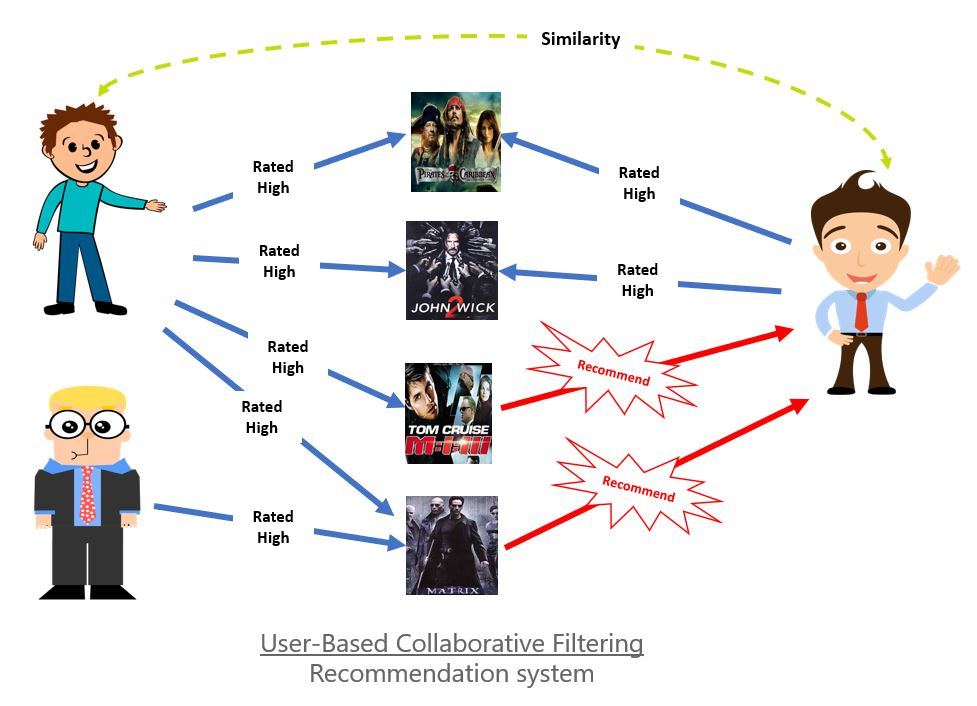

In [ ]:
# Popularity based recommender system
# content based Recommender system---item based
# collaborative filtering----user based
# Hybrid  Recommender system

In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("movies.csv")
df1=pd.read_csv("credits.csv")

In [ ]:
print(df.shape)
print(df1.shape)

(4803, 20)
(4803, 4)


In [ ]:
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
print(df.columns)
print()
print(df1.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [ ]:
# Join the both the table

In [ ]:
df=df.merge(df1,on="title")

In [ ]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
df.shape

(4809, 23)

In [ ]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [ ]:
df["original_language"].value_counts(normalize=True)

en    0.937825
fr    0.014556
es    0.006654
zh    0.005614
de    0.005614
hi    0.003951
ja    0.003327
it    0.002911
ko    0.002495
cn    0.002495
ru    0.002287
pt    0.001871
da    0.001456
sv    0.001040
nl    0.000832
fa    0.000832
th    0.000624
he    0.000624
ta    0.000416
cs    0.000416
ro    0.000416
id    0.000416
ar    0.000416
vi    0.000208
sl    0.000208
ps    0.000208
no    0.000208
ky    0.000208
hu    0.000208
pl    0.000208
af    0.000208
nb    0.000208
tr    0.000208
is    0.000208
xx    0.000208
te    0.000208
el    0.000208
Name: original_language, dtype: float64

In [ ]:
# 93% movies :English

In [ ]:
df=df[['movie_id','title','overview','genres','keywords', 'cast', 'crew']]

In [ ]:
df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df["genres"][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
df["genres"][1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [ ]:
# Check missing data
df.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# To extract details from dictionary:ast
import ast


In [ ]:
def convert(text):
  L= []
  for i in ast.literal_eval(text):
    L.append(i["name"])
  return L

In [ ]:
df["genres"]=df["genres"].apply(convert)

In [ ]:
df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df["keywords"][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [ ]:
df["keywords"]=df["keywords"].apply(convert)

In [ ]:
df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
def convert3(text):
  L= []
  counter=0
  for i in ast.literal_eval(text):
    if counter <3:
      L.append(i["name"])
    counter +=1
  return L


In [ ]:
df["cast"]=df["cast"].apply(convert3)

In [ ]:
df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [ ]:
def fetch_director(text):
  L= []
  for i in ast.literal_eval(text):
    if i["job"]=="Director":
      L.append(i["name"])
  return L

In [ ]:
df["crew"]=df["crew"].apply(fetch_director)

In [ ]:
df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [ ]:
# Feature Extration model
def collapse(L):
  L1 =[]
  for i in L:
    L1.append(i.replace(" ",""))
  return L1

In [ ]:
df["genres"]=df["genres"].apply(collapse)
df["keywords"]=df["keywords"].apply(collapse)
df["cast"]=df["cast"].apply(collapse)
df["crew"]=df["crew"].apply(collapse)

In [ ]:
df.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [ ]:
print(df["overview"][0])
print(df["genres"][0])
print("*************"*10)
print(df["keywords"][0])
print("*************"*10)
print(df["cast"][0])
print("*************"*10)
print(df["crew"][0])
print("*************"*10)

In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.
['Action', 'Adventure', 'Fantasy', 'ScienceFiction']
**********************************************************************************************************************************
['cultureclash', 'future', 'spacewar', 'spacecolony', 'society', 'spacetravel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alienplanet', 'cgi', 'marine', 'soldier', 'battle', 'loveaffair', 'antiwar', 'powerrelations', 'mindandsoul', '3d']
**********************************************************************************************************************************
['SamWorthington', 'ZoeSaldana', 'SigourneyWeaver']
**********************************************************************************************************************************
['JamesCameron']
************************************************************

In [ ]:
# split the sentence into the words

In [ ]:
df["overview"]=df["overview"].apply(lambda x : x.split())

In [ ]:
df.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [ ]:
# MAKE one column basis overview,genres,keywords,cast and crew

In [ ]:
df["tags"] = df["overview"]+df["genres"]+df["keywords"]+df["cast"]+df["crew"]

In [ ]:
df.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
new =df.drop(["overview","genres","keywords","cast","crew"],axis=1)

In [ ]:
new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
new["tags"]=new["tags"].apply(lambda x: " ".join(x))

In [ ]:
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [ ]:
new["tags"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [ ]:
# Bag of words:Text data convert into Vector

In [ ]:
# Feature extraction Technique

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer(stop_words="english",max_features=5000)
# apply stopwords and also give haed coded feature value=5000
vector=cv.fit_transform(new["tags"]).toarray()
vector.shape

(4806, 5000)

In [ ]:
# To use similarity matrix for building recommendation system
# cos(thita)=1------highly similar
# cos(thita)=0-------highly dissimilar

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity =cosine_similarity(vector)

In [ ]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [ ]:
new.head(2)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."


In [ ]:
new.tail(10)

,movie_id,title,tags
4799,182291,On The Downlow,Isaac and Angel are two young Latinos involved...
4800,286939,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ..."
4801,124606,Bang,A young woman in L.A. is having a bad day: she...
4802,14337,Primer,Friends/fledgling entrepreneurs invent a devic...
4803,67238,Cavite,"Adam, a security guard, travels from Californi..."
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...
4808,25975,My Date with Drew,Ever since the second grade when he first saw ...


In [ ]:
new[new["title"]=="Sanctuary: Quite a Conundrum"].index[0]

4800

In [ ]:
new[new["title"]=="Shanghai Calling"].index[0]

4807

**Recommendation System**


In [ ]:
def recommend(movie):
  index =new[new['title']==movie].index[0]
  distances=sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])

  for i in distances[1:6]:
    print(new.iloc[i[0]].title)

In [ ]:
recommend("Avatar")

Titan A.E.
Small Soldiers
Ender's Game
Aliens vs Predator: Requiem
Independence Day


In [ ]:
recommend("Spider-Man 3")

Spider-Man 2
Spider-Man
The Amazing Spider-Man 2
The Amazing Spider-Man
Arachnophobia


In [ ]:
recommend("Gandhi")

Gandhi, My Father
The Wind That Shakes the Barley
A Passage to India
Guiana 1838
Ramanujan


In [ ]:
recommend("Primer")

Purple Violets
She's the One
My Big Fat Greek Wedding 2
Lovely & Amazing
I Don't Know How She Does It


In [ ]:
# Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(new.to_dict(),open("Movie_dict.pkl","wb"))

In [ ]:
pickle.dump(similarity,open("similarity.pkl","wb"))

In [ ]:
# import pickle
# import streamlit as st
# import pandas as pd


# def recommend(movie):
#     movie_index = movies[movies['title']==movie].index[0]
#     distances = similarity[movie_index]
#     movies_list = sorted(list(enumerate(distances)), reverse=True, key= lambda x: x[1])[1:6]
#     recommended_movies = []
#     for i in movies_list:
#         recommended_movies.append(movies.iloc[i[0]].title)
#     return recommended_movies

# movies_dict = pickle.load(open('movie_dict.pkl', 'rb'))
# movies = pd.DataFrame(movies_dict)
# similarity = pickle.load(open('similarity.pkl', 'rb'))

# st.title("Movie Recommender System")

# selected_movie_name = st.selectbox(
#     'How would you like to be contacted ?',
#     movies['title'].values)

# if st.button('recommend'):
#     recommendations = recommend(selected_movie_name)

# for i in recommendations:
#     st.write(i)


# Conclusion:

In this project, we have developed a content-based movie recommendation system to assist movie enthusiasts in finding films that align with their unique tastes. Our dataset encompasses a wide array of movie attributes, and we leveraged these attributes to build a recommendation system that understands the core characteristics of each film.

By analyzing movie overviews, genres, keywords, cast members, and crew information, we aimed to offer personalized movie suggestions that go beyond popular trends. Our system provides users with movie recommendations that are tailored to their preferences, enhancing their movie-watching experience.


We've also taken a step further by deploying this project on the Streamlit Cloud platform, making it accessible to users online. This deployment ensures that anyone, anywhere can easily access and utilize our movie recommendation system.

This project showcases the power of data and technology in making entertainment more enjoyable and accessible. We hope that our recommendation system helps viewers discover their next cinematic gem effortlessly, making movie nights more enjoyable and memorable, whether they access it here or on the Streamlit Cloud platform.
